In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, MaxNLocator)

from pyphasechip import pyphasechip_logic as pypc

## Variables

In [2]:
# reagent 1 name
name_sol1 = "BSA"
# reagent 1 starting contentration
initial_conc_sol1 = 266
# unit
unit_sol1 = "µM"


# reagent 2 name
name_sol2 = "PEG"
# reagent 2 starting concentration
initial_conc_sol2 = 10
# unit
unit_sol2 = "%"


# mixing ratio of the concentrations 0
# [1:X]
initial_ratio = 7


# Number of different concentrations used
number_of_diff_conc = 1

# Number of wells per row(!) per concentrations
# usually equals 10
n_wells = 1

# How many hours did the experiment last?
hours_of_experiment = 17


# How many pictures where taken per hour per well?
images_per_hour = 1


# percental difference of img mean to all previous imgages. 
percental_threshold = 15 


# measured diameter of chamber to calculate radii for circle detection -> min and max [px]
# around +-30 of the real value, best measured with something like imageJ/Fiji
diameter = 240
minRadiusChamber = int((diameter/2)*0.7)
maxRadiusChamber = int((diameter/2)*1.3)


# height of chamber [µm]
chamber_height = 60

# folder where images are stored
# best is to use only paths without any whitespace
#image_folder = "C:Users/DigitalStation/Documents/Universität Stuttgart/Institut für industrielle Bioverfahrenstechnik/1_Masterthesis/Experiments/20210804 First OFM Exp/Images"
#image_folder = r"C:\Users\DigitalStation\Documents\Python_Scripts\DropletDetection\TestImages"

image_folder = r"C:\Users\DigitalStation\Documents\Python_Scripts\DropletDetection\testimages2"

# datatype of the images
extension = ".jpg"

## Programm

Creating and sorting image list


100%|█████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 155.47it/s]


writing images into big dictionary


100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 543.83it/s]


detect chambers and create masks


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.24s/it]


LLPS detection


100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 72.96it/s]


calculation of the critical concentration


100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 18035.71it/s]


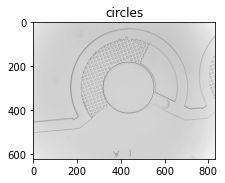

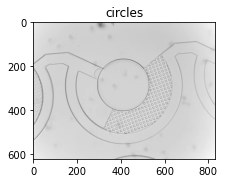

In [3]:
# Create all the necessary dicts and lists
image_list, image_names, data_well, well, concentration, time_resolution = pypc.create()

# Load images & convert to grayscale
pypc.images_to_list(image_list, image_names, image_folder, extension)
pypc.images_to_dict(hours_of_experiment, images_per_hour, number_of_diff_conc, n_wells, image_list, image_names,
                    time_resolution, concentration, well, data_well)

# Detect chamber, create & apply mask
pypc.chamber_detection_and_mask_creation(number_of_diff_conc, n_wells, time_resolution, minRadiusChamber, maxRadiusChamber)

# Detect LLPS
pypc.detect_LLPS(hours_of_experiment, images_per_hour, number_of_diff_conc, n_wells,
                 time_resolution, percental_threshold)

# Calculate c_crit
starting_concentrations = pypc.ccrit_calculation(initial_conc_sol1, initial_conc_sol2, initial_ratio,
                       hours_of_experiment, images_per_hour, number_of_diff_conc, n_wells, time_resolution)

# saves the image names where LLPS was detected and the calculated concentrations to a csv file
# .csv gets safed in the image folder
#pypc.save_results_to_csv(time_resolution, image_folder, number_of_diff_conc, n_wells, hours_of_experiment,
#                       images_per_hour, name_sol1, name_sol2, unit_sol1, unit_sol2)


## quality control

initial concentrations:
BSA  PEG
[[228.           1.42857143]
 [180.5          3.21428571]
 [133.           5.        ]
 [ 85.5          6.78571429]
 [ 38.           8.57142857]]
 
LLPS concentrations:
BSA - conc. 0: 469.967 µM
PEG - conc. 0: 2.945 %
True


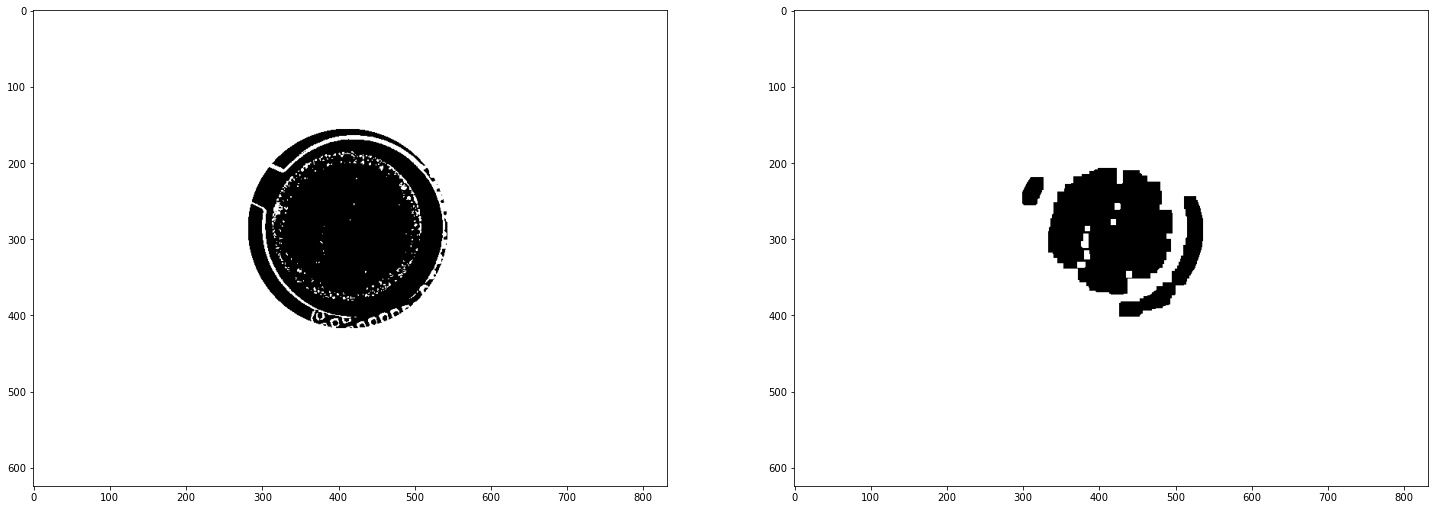

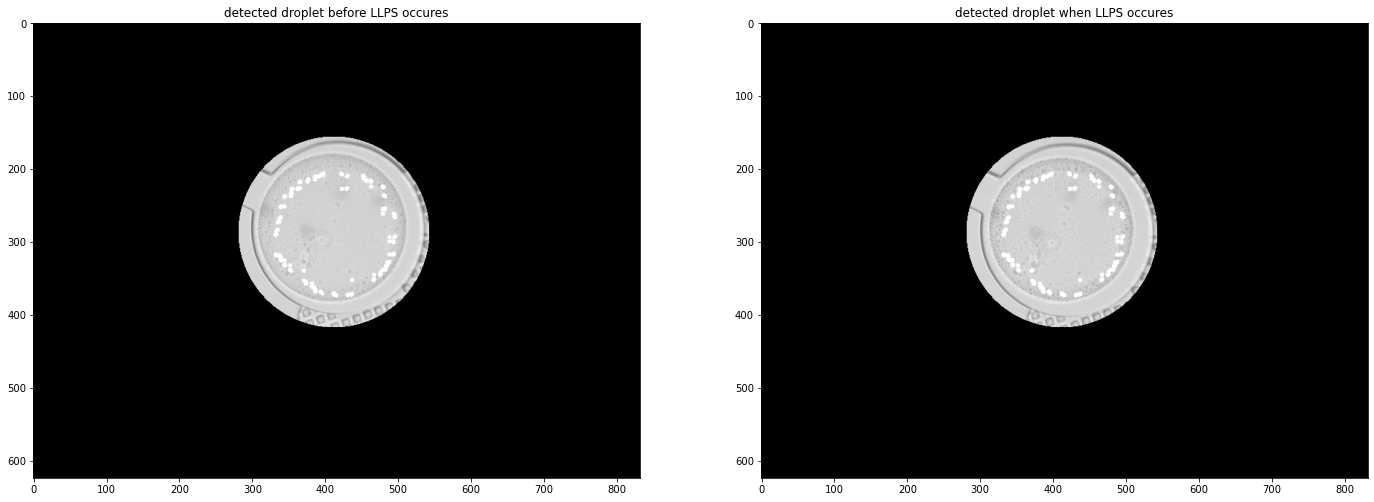

In [4]:
# concentration to check
conc_nr = 0

# well to check
well_nr = 1

#test
plt.subplots(figsize=(25, 25))
plt.subplot(121)
plt.imshow(time_resolution[0][conc_nr][well_nr]['thresh'], cmap='gray')
plt.subplot(122)
plt.imshow(time_resolution[0][conc_nr][well_nr]['dilateanderode'], cmap='gray')

# uncomment this to get some insight into image processing
pypc.quality_control(time_resolution, conc_nr, well_nr, name_sol1, name_sol2, unit_sol1, unit_sol2, starting_concentrations)
print(time_resolution[0][conc_nr][well_nr]['well found'])

207.4362614799063


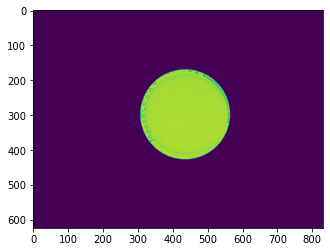

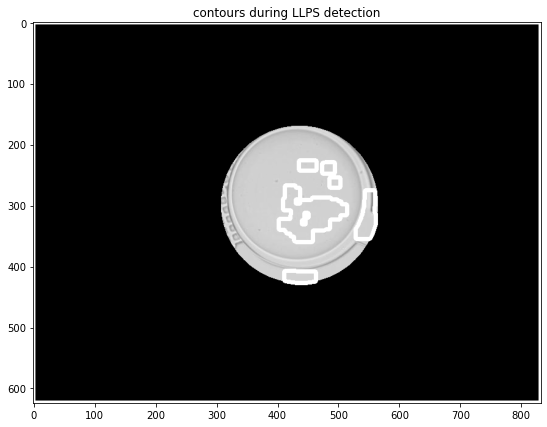

In [5]:
time_idx = 0
conc_nr = 0
well_nr = 0
print(np.mean(time_resolution[time_idx][conc_nr][well_nr]['gray'].copy()))

plt.imshow(time_resolution[0][conc_nr][well_nr]['masked image'])

##########################################################################################################
time_idx = 0
conc_nr = 0
well_nr = 0
contour_img2 = cv2.drawContours(time_resolution[5][conc_nr][well_nr]['masked image'], time_resolution[time_idx][conc_nr][well_nr]['contours'], -1, (255, 165, 0), 5)
plt.subplots(figsize=(20, 20))
plt.subplot(121)
plt.title('contours during LLPS detection')
plt.imshow(contour_img2, cmap='gray')

##########################################################################################################

## Plot the data

In [ ]:
### figure setup ###


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8), sharex=False, sharey=False)

# set labels
ax1.set_xlabel(f"{name_sol2} [{unit_sol2}]")
ax1.set_ylabel(f"{name_sol1} [{unit_sol1}]")
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)

ax2.set_xlabel(ax1.get_xlabel())
ax2.xaxis.label.set_size(ax1.xaxis.label.get_size())
ax2.set_ylabel(ax1.get_ylabel())
ax2.yaxis.label.set_size(ax1.yaxis.label.get_size())

# set limits 
xlim = 15
ylim = 50
ax1.set_xlim(0, xlim)
ax1.set_ylim(0, ylim)
ax2.set_xlim(0, xlim)
ax2.set_ylim(0, ylim)

# set titles
ax1.set_title('individual wells', fontsize=25)
ax2.set_title('means', fontsize= 25)

# set ticks
ax1.tick_params(axis='y', which='major', right=True, color="black", labelcolor="black", direction='out', labelsize=15)
ax1.tick_params(axis='y', which='minor', right=True)
ax1.tick_params(axis='x', which='major', top=True, labeltop=False, direction='out', labelsize=15)
ax1.tick_params(axis='x', which='minor', bottom=True, top=True)
ax1.minorticks_on()
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.xaxis.set_tick_params(which='both', width=2)
ax1.yaxis.set_tick_params(which='both', width=2)


ax2.tick_params(axis='y', which='major', right=True, color="black", labelcolor="black", direction='out', labelsize=15)
ax2.tick_params(axis='y', which='minor', right=True)
ax2.tick_params(axis='x', which='major', top=True, labeltop=False, direction='out', labelsize=15)
ax2.tick_params(axis='x', which='minor', bottom=True, top=True)
ax2.minorticks_on()
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.xaxis.set_tick_params(which='both', width=2)
ax2.yaxis.set_tick_params(which='both', width=2)


# plot starting concentrations and the data
well_nr = 0

for conc_nr in range (number_of_diff_conc):
    for n_rows_per_conc in range(2):
        for n_wells_per_row in range(n_wells):
            if time_resolution[0][conc_nr][well_nr]['well found'] is True and time_resolution[0][conc_nr][well_nr]['LLPS status'] is True:
            
                if conc_nr == 0:
                    color = "blue"
                if conc_nr == 1:
                    color = "orange"
                if conc_nr == 2:
                    color = "gray"
                if conc_nr == 3:
                    color = "yellow"
                if conc_nr == 4:
                    color = "green"

                ax1.scatter(starting_concentrations[conc_nr,1], starting_concentrations[conc_nr,0], s=60, c=color, marker="s", edgecolors="black")
                ax1.scatter(time_resolution[0][conc_nr][well_nr]['LLPS conc'][0,1],time_resolution[0][conc_nr][well_nr]['LLPS conc'][0,0],
                            s=60, color=color, marker="o", edgecolors="black")
                
            well_nr += 1
    well_nr = 0
well_nr = 0


# calculate and plot mean
mean_sol1 = []
mean_sol1 = [0] * 5
mean_sol2 = []
mean_sol2 = [0] * 5
n_llps_wells = []
n_llps_wells = [0] * 5

for conc_nr in range (number_of_diff_conc):
    for n_rows_per_conc in range(2):
        for n_wells_per_row in range(n_wells):
            if time_resolution[0][conc_nr][well_nr]['well found'] is True and time_resolution[0][conc_nr][well_nr]['LLPS status'] is True:           
                # calculate mean
                mean_sol1[conc_nr] = mean_sol1[conc_nr] + time_resolution[0][conc_nr][well_nr]['LLPS conc'][0,0]
                mean_sol2[conc_nr] = mean_sol2[conc_nr] + time_resolution[0][conc_nr][well_nr]['LLPS conc'][0,1]
                n_llps_wells[conc_nr] += 1  
                
            well_nr += 1
    well_nr = 0
well_nr = 0


for conc_nr in range(5):
    if conc_nr == 0:
        color = "blue"
    if conc_nr == 1:
        color = "orange"
    if conc_nr == 2:
        color = "gray"
    if conc_nr == 3:
        color = "yellow"
    if conc_nr == 4:
        color = "green"
    mean_sol1[conc_nr] = mean_sol1[conc_nr]/n_llps_wells[conc_nr]
    mean_sol2[conc_nr] = mean_sol2[conc_nr]/n_llps_wells[conc_nr]
    
    m = mean_sol1[conc_nr]/mean_sol2[conc_nr]
    ax2.plot([0, mean_sol2[conc_nr],xlim], [0, mean_sol1[conc_nr], m*xlim], color=color, linestyle='dashed', alpha=0.50)
    ax2.scatter(starting_concentrations[conc_nr,1], starting_concentrations[conc_nr,0], s=60, c=color, marker="s", edgecolors="black")

    ax2.scatter(mean_sol2[conc_nr],mean_sol1[conc_nr], s=60, color=color,
                           marker="o", edgecolors="black")
 